Welcome! In this Lab, we are going to build a simple logistic regression model from scratch, just using Gradient Descent, and NumPy; thus, we gain a more solid foundation of Machine Learning, and gradient descent; and then apply that knowledge to more complex Machine Learning models, such as Artificial Neural Network, and Deep Learning.

In [ ]:
# Import packages

# Operational packages
import numpy as np
import pandas as pd

# Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Seaborn beside Visualization, is also a free strong library for working with datasets; You don't need to download any data; All you need to do, is just read and load your favorite dataset, by importing that from the Seaborn Built-in-datasets. </br>
`iris` on the other hand, is one of the most popular machine learning datasets, used frequently in building Multi-Label logistic regression models. </br>
But in this exercise, we are going to evaluate a Binary classification model.

In [ ]:
# Load the dataset from seaborn

data = sns.load_dataset('iris')

In [ ]:
# Display the few couple of rows

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Display the number of categories in the target column `species`

data.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

As we can see, the number of categories are symmetric; means we have 3 categories, each with 50 samples.</br>
For this scenario, we are going to just use two random categories, which are `setosa`, and `versicolor`.

In [ ]:
# Use filtering, so that we have just two groups, and save it in a new variable.

df = data[(data['species'] == 'setosa') | (data['species'] == 'versicolor')]

In [ ]:
# Display new data.

df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


Because we are building logistic regression model, let's One-Hot-Encode the target variable.

In [ ]:
# Set the value of `setosa` to be equal to 0, and `versicolor`, to 1

df['species'] = np.where(df['species'] == 'setosa', 0, 1)

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


Let's use `.corr()` method, to see the correlations of features, with respect to our target, and pick up the most relevant one.

*Note:* The target variable in this scenario is **species**.

In [ ]:
# Using the .corr() method

df.corr()['species'].apply(abs).sort_values()

sepal_width     0.690684
sepal_length    0.728290
petal_width     0.960307
petal_length    0.969990
species         1.000000
Name: species, dtype: float64

As we can see, `petal_length` is the champion feature; so let's pick that as our predictor.

In [ ]:
# Make X that would be in this case `petal_length`, as an array
x_train = np.array(df['petal_length'])

# Save the target variable as an array
y_train = np.array(df['species'])

In [ ]:
# Display the first 5 elements of feature

x_train[:5]

array([1.4, 1.4, 1.3, 1.5, 1.4])

In [ ]:
# Display the first 5 elements of target

y_train[:5]

array([0, 0, 0, 0, 0])

For our logistic regression, we are going to use **Sigmoid function**, which measures the probability that a new input belongs to the positive class. $P(y=1∣x;θ) = 1 / 1 + e^ -(θ^ Tx+b)$


---






In the context of neural network, it is also called *Activation Function*.

Let's see how this function works;
For any negative values, would the output approach to 0, and for any positive value, it would approach to 1. How about 0? If the input equals to 0, the output would be equal to 0.5. <br>
*Note:* The `exponential` term as base has a value equals to approximately 2.718, which is also called `Euler's Number`

Let's see this first in code by visualization, and then in action.

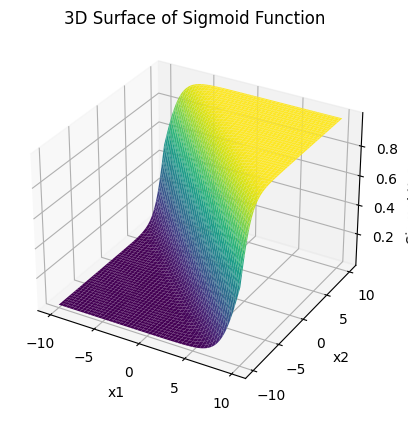

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate data for x1 and x2
x1_values = np.linspace(-10, 10, 100)
x2_values = np.linspace(-10, 10, 100)
x1_grid, x2_grid = np.meshgrid(x1_values, x2_values)

# Compute the output of the sigmoid function for each combination of x1 and x2
z_grid = sigmoid(x1_grid + x2_grid)

# Plot the sigmoid function as a 3D surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1_grid, x2_grid, z_grid, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Sigmoid(x1 + x2)')
ax.set_title('3D Surface of Sigmoid Function')
plt.show();

From the above function, we can see, that the sigmoid function has a $S$ shape. This is because of the 0, and 1, and the criteria equals to 0.5 between them.

In [ ]:
# Write the sigmoid function.

def sigmoid(z):

  return 1 / (1 + np.exp(-z))

In [ ]:
inputs = np.array([-100, 0, 100])
print(sigmoid(inputs))

[3.72007598e-44 5.00000000e-01 1.00000000e+00]


In [ ]:
print(sigmoid(0))

0.5


Now let's write a function for logistic regression cost function. The cost function in logistic regression is also called **Cross Entropy** or **Log-Loss**. <br>
The reason behind the name is that, whenever we are evaluating neural network, deep learning, or regression models, we are trying to minimize the cost (error or loss) function or the distance between the actual and the predicted values. We continue minimizing the parameters of the cost function using partial derivatives (Gradients), and decrease the value of gradients each time (descent), so that we reach the `Global Minimum`; As you may know, global minimum is the term used for `convex`or bowl shaped functions; But in the term logistic regression, the cost function is not convex; Taking logarithm of the predicted values in this case, addresses the problem, and thus, makes our cost function convex, so that we have just one global minima, and not multiple local minima.

In [ ]:
# Write a function for logistic regression cost function.

def compute_cost(x,y,w,b):

  # Save the shape of training set
  m = x.shape[0]

  # Using vectorization write the linear equation
  Z = np.dot(x, w) + b

  # Pass the linear equation as argumant to the sigmoid function
  y_hat = sigmoid(Z)

  # Calculate the cost
  log_loss = (-1 / m) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

  # Return the cost
  return log_loss

In [ ]:
# Example Usage: (Try it once for none-zero, and zero value)

initial_w = 0.2
initial_b = 0.2
cost_non_zero = compute_cost(x_train, y_train, initial_w, initial_b)
print(f"initial Cost (at non zero): {cost_non_zero}")

initial Cost (at non zero): 0.6349349566583244


In [ ]:
# For zero

initial_w = 0
initial_b = 0
cost_zero = compute_cost(x_train, y_train, initial_w, initial_b)
print("initial Cost (at zero): ", cost_zero)

initial Cost (at zero):  0.6931471805599453


From those two above outputs, we can see that, the more we approach to 0, the greater is the value of cost.

Now let's write our gradient descent function; In this case, we would make the value of cost in each iteration smaller, so that the gradient descent reaches, or gets closer to the minimum.

First, let's plot the cost function to have an overview of how the function might look like.

<ipython-input-20-dfea939af7ef>:8: RuntimeWarning: divide by zero encountered in log
  J = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-20-dfea939af7ef>:8: RuntimeWarning: invalid value encountered in multiply
  J = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))


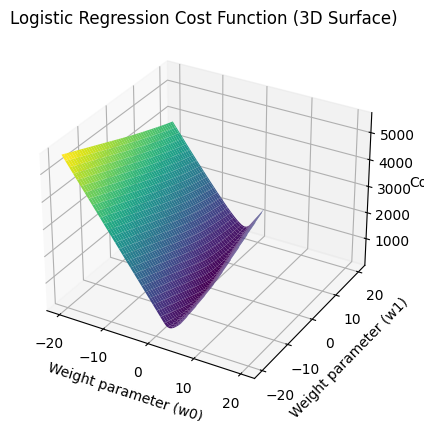

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_cost_function(x, y, w):
    m = len(x)
    z = np.dot(x, w)
    h = sigmoid(z)
    J = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return J

# Generate some sample data
np.random.seed(0)
m = 100
x = np.random.rand(m, 1) * 10
y = (x > 5).astype(int)

# Add intercept term to features
x_with_intercept = np.hstack((np.ones((m, 1)), x))

# Generate a grid of values for the weight parameters
w0_values = np.linspace(-20, 20, 100)
w1_values = np.linspace(-20, 20, 100)
w0_grid, w1_grid = np.meshgrid(w0_values, w1_values)

# Calculate the cost for each combination of weight parameter values
cost_values = np.zeros_like(w0_grid)
for i in range(len(w0_values)):
    for j in range(len(w1_values)):
        cost_values[i, j] = logistic_cost_function(x_with_intercept, y, np.array([w0_values[i], w1_values[j]]))

# Plot the cost function as a 3D surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(w0_grid, w1_grid, cost_values, cmap='viridis')
ax.set_xlabel('Weight parameter (w0)')
ax.set_ylabel('Weight parameter (w1)')
ax.set_zlabel('Cost')
ax.set_title('Logistic Regression Cost Function (3D Surface)')
plt.show();

Now we can understand better, what do we by taking the logarithms of cost function mean, and why is it useful.<br>
The left side shows the log loss, when the actual class is 1 (positive class); This is when we have just the following simplified to the expression: *If $y^i = 1$ then => $-log(fw,b(x^i))-y^(i))$*

<br>

Just like the above equation, right side shows the log loss, when the actual class is 0 (negative class), then it would simplified to the expression: *If $y^(i) = 0$* $-log(1 - fw,b(x^(i))$

<br>

And as you can see, the combination of these two functions, make a convex function, which has just one global minimum, and our goal in writing the following codes is to reach this minimum, or get as close as enough to that.

$$ J(\mathbf{w}.b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\right]$$

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{1}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{2}
$$

In [ ]:
# Write the gradient descent function

def compute_gradient_descent(x,y,w,b,learning_rate,iterations):

  # Save the size of training set
  m = x.shape[0]

  # Iterate over the range of iterations
  for epoch in range(1, iterations+1):

    # Linear equation
    Z = np.dot(x, w) + b

    # Pass it to the sigmoid function
    y_hat = sigmoid(Z)

    # Calculate the cost
    log_loss = (-1 / m) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

    # Calculate the partial derivatives with respect to w, and b
    dj_dw = np.dot(x.T, y_hat - y) / m
    dj_db = np.sum(y_hat - y) / m

    # Update the gradients based on the update-rule
    w -= learning_rate * dj_dw
    b -= learning_rate * dj_db

    # Print the minimized parameters in each iteration
    print(f"Epoche {epoch} [==============] Cross Entropy = {log_loss:.4} - w = {w:.4} - b = {b:.4}")

  # Save and return the minimized parameters
  return w, b

In [ ]:
# Example Usage:
initial_w = 0
initial_b = 0
learning_rate = 0.01
iterations = 10000

optimized_weight, optimized_bias = compute_gradient_descent(x_train, y_train, initial_w, initial_b, learning_rate, iterations)
print(f"Optimized Weight found by Gradient Descent: {optimized_weight:.4}")
print(f"Optimized Bias found by Gradient Descent: {optimized_bias:.4}")

Streaming output truncated to the last 5000 lines.
Epoche 5003 [==============] Cross Entropy = 0.1168 - w = 1.679 - b = -4.219
Epoche 5004 [==============] Cross Entropy = 0.1167 - w = 1.679 - b = -4.22
Epoche 5005 [==============] Cross Entropy = 0.1167 - w = 1.679 - b = -4.22
Epoche 5006 [==============] Cross Entropy = 0.1167 - w = 1.679 - b = -4.221
Epoche 5007 [==============] Cross Entropy = 0.1167 - w = 1.679 - b = -4.221
Epoche 5008 [==============] Cross Entropy = 0.1167 - w = 1.68 - b = -4.221
Epoche 5009 [==============] Cross Entropy = 0.1166 - w = 1.68 - b = -4.222
Epoche 5010 [==============] Cross Entropy = 0.1166 - w = 1.68 - b = -4.222
Epoche 5011 [==============] Cross Entropy = 0.1166 - w = 1.68 - b = -4.223
Epoche 5012 [==============] Cross Entropy = 0.1166 - w = 1.68 - b = -4.223
Epoche 5013 [==============] Cross Entropy = 0.1166 - w = 1.68 - b = -4.224
Epoche 5014 [==============] Cross Entropy = 0.1165 - w = 1.681 - b = -4.224
Epoche 5015 [==============] Cros

As we can see, the cost has significant reduction; It decreased from approximately 0.6 to 0.06; And the parameters are also minimized.

Now let's make predictions based on the model we have.

In [ ]:
# Write a function, that predicts new features based on the evaluated model.

def predict(x,w,b):

  # Calculate linear combination
    Z = np.dot(x, w) + b

    # Apply sigmoid function
    y_hat = sigmoid(Z)

    # Threshold probabilities to obtain binary predictions
    predictions = np.where(y_hat > 0.5, 1, 0)

    return predictions

In [ ]:
df[['petal_length', 'species']].head()

,petal_length,species
0,1.4,0
1,1.4,0
2,1.3,0
3,1.5,0
4,1.4,0


In [ ]:
# Example Usage:
x_new = np.array([1.4, 1.4, 1.3, 1.5, 1.4])
w = optimized_weight
b = optimized_bias
prediction = predict(x_new, w, b)
print(f"Gradient Descent predicted values: {prediction}")
print(f"Actual values: {y_train[:5]}")

Gradient Descent predicted values: [0 0 0 0 0]
Actual values: [0 0 0 0 0]


Now let's calculate the model's accuracy.

In [ ]:
# Write a model that calculates the accuracy of the GD model.

def compute_accuracy(y_true, y_pred):

  # Ensure inputs have the same shape
  assert y_true.shape == y_pred.shape, "Shapes of true and predicted labels must match."

  # Compute accuracy
  accuracy = np.mean(y_true == y_pred) * 100

  return accuracy

In [ ]:
# True labels for the test set
y_test = y_train

# Use the predict function to obtain predicted labels
y_pred = predict(x_train, w, b)

# Compute accuracy using the compute_accuracy function
accuracy = compute_accuracy(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 100.0


### Gradient for regularized logistic regression

$$J(\mathbf{w},b) = \frac{1}{m}  \sum_{i=0}^{m-1} \left[ -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \right] + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{1}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} + \frac{\lambda}{m} w_j  \quad\, \mbox{for $j=0...(n-1)$}\tag{2}
$$

We shouldn't be happy! Because there is always the risk of overfitting; However, in this model, we have a very little data, and adding more data addresses this issue. But as we don't have this opportunity, let's re-evaluate the model, this time using regularized gradient descent, which is a solution used for overfitting.

In [ ]:
# Write the regularized gradient descent

def regularized_gradient_descent(x,y,w,b,learning_rate,penalty,iterations):

  # Save the shape of training set in a variable
  m = x.shape[0]

  for epoch in range(1, iterations+1):

    # Linear equation
    Z = np.dot(x, w) + b
    y_hat = sigmoid(Z)

    # Calulate regularized MLE (Maximum Likelihood Estimation)
    reg_cost = (-1 / m) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)) + ((penalty / (2 * m)) * np.sum(w ** 2))

    # Calculate Gradients, with respect to regularization term as well
    dj_dw = np.dot(x.T, y_hat - y) + ((penalty / m) * w)
    dj_db = np.sum(y_hat - y)

    # Update the parametrs
    w -= learning_rate * dj_dw
    b -= learning_rate * dj_db

    print(f"Epoche {epoch} [===================] regularized cost = {reg_cost:.4} - w = {w:.4} - b = {b:.4}")

  # Return the minimized parameters
  return w, b

In [ ]:
# Example Usage:
initial_w = 0
initial_b = 0
learning_rate = 0.01
penalty = 0.1
iterations = 10000

optimized_weight, optimized_bias = regularized_gradient_descent(x_train, y_train, initial_w, initial_b, learning_rate, penalty, iterations)
print(f"Optimized Weight found by Gradient Descent: {optimized_weight:.4}")
print(f"Optimized Bias found by Gradient Descent: {optimized_bias:.4}")

Streaming output truncated to the last 5000 lines.
Epoche 5003 [===================] regularized cost = 0.02072 - w = 6.085 - b = -15.38
Epoche 5004 [===================] regularized cost = 0.02072 - w = 6.085 - b = -15.38
Epoche 5005 [===================] regularized cost = 0.02072 - w = 6.086 - b = -15.38
Epoche 5006 [===================] regularized cost = 0.02072 - w = 6.086 - b = -15.38
Epoche 5007 [===================] regularized cost = 0.02072 - w = 6.086 - b = -15.38
Epoche 5008 [===================] regularized cost = 0.02072 - w = 6.086 - b = -15.39
Epoche 5009 [===================] regularized cost = 0.02072 - w = 6.087 - b = -15.39
Epoche 5010 [===================] regularized cost = 0.02072 - w = 6.087 - b = -15.39
Epoche 5011 [===================] regularized cost = 0.02073 - w = 6.087 - b = -15.39
Epoche 5012 [===================] regularized cost = 0.02073 - w = 6.087 - b = -15.39
Epoche 5013 [===================] regularized cost = 0.02073 - w = 6.087 - b = -15.39
Epo

In the case above, we didn't add the regularization term to the bias as well; why? Because the bias term controls the vertical shift of the sigmoid function and typically has less influence on the model's complexity compared to the weight parameters. <br>
Let's see whether we can even do better.

In [ ]:
# Example Usage:
initial_w = 0
initial_b = 0
learning_rate = 0.01
penalty = 0.01     # Changed to 0.01 instead of 0.1
iterations = 10000

optimized_weight, optimized_bias = regularized_gradient_descent(x_train, y_train, initial_w, initial_b, learning_rate, penalty, iterations)
print(f"Optimized Weight found by Gradient Descent: {optimized_weight:.4}")
print(f"Optimized Bias found by Gradient Descent: {optimized_bias:.4}")

Streaming output truncated to the last 5000 lines.
Epoche 5003 [===================] regularized cost = 0.004039 - w = 6.107 - b = -15.43
Epoche 5004 [===================] regularized cost = 0.004038 - w = 6.108 - b = -15.43
Epoche 5005 [===================] regularized cost = 0.004038 - w = 6.108 - b = -15.43
Epoche 5006 [===================] regularized cost = 0.004038 - w = 6.108 - b = -15.43
Epoche 5007 [===================] regularized cost = 0.004038 - w = 6.108 - b = -15.43
Epoche 5008 [===================] regularized cost = 0.004038 - w = 6.109 - b = -15.43
Epoche 5009 [===================] regularized cost = 0.004037 - w = 6.109 - b = -15.43
Epoche 5010 [===================] regularized cost = 0.004037 - w = 6.109 - b = -15.43
Epoche 5011 [===================] regularized cost = 0.004037 - w = 6.109 - b = -15.43
Epoche 5012 [===================] regularized cost = 0.004037 - w = 6.109 - b = -15.43
Epoche 5013 [===================] regularized cost = 0.004036 - w = 6.11 - b = 

It seems making the `lambda` (regularization term) smaller, makes the model better. Let's make predictions on this model.

In [ ]:
df[['petal_length', 'species']].tail()

,petal_length,species
95,4.2,1
96,4.2,1
97,4.3,1
98,3.0,1
99,4.1,1


In [ ]:
# Example Usage:
x_new = np.array([4.2, 4.2, 4.3, 3.0, 4.1, 1.7, 1.4, 1.5, 1.4, 1.5])
w = optimized_weight
b = optimized_bias
prediction = predict(x_new, w, b)
print(f"Gradient Descent predicted values: {prediction}")

Gradient Descent predicted values: [1 1 1 1 1 0 0 0 0 0]


### Evaluating regularized logistic regression model

Let's calculate the accuracy too.

In [ ]:
# True labels for the test set
y_test = y_train

# Use the predict function to obtain predicted labels
y_pred = predict(x_train, w, b)

# Compute accuracy using the compute_accuracy function
accuracy = compute_accuracy(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 100.0


The results seem well; thus, we may want to use this model for further analysis as well.<br>
Thanks for your attention!